In [1]:
# Set seed for reproducibility
import random; random.seed(53)

# Import all we need from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

In [2]:
import pandas as pd

# Load data
tweet_df = pd.read_csv('tweets_hw9_tidy.csv')

# Create target
y = tweet_df.author

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(tweet_df['status'], y, test_size=0.33, 
                 random_state=53)

In [3]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', 
                                   min_df=0.05, max_df=0.9)

# Create count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', 
                                   min_df=0.05, max_df=0.9)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [4]:
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, y_train)
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

count_nb = MultinomialNB()
count_nb.fit(count_train, y_train)
count_nb_pred = count_nb.predict(count_test)
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.6590909090909091
NaiveBayes Count Score:  0.6742424242424242


Confusion matrix, without normalization
Confusion matrix, without normalization


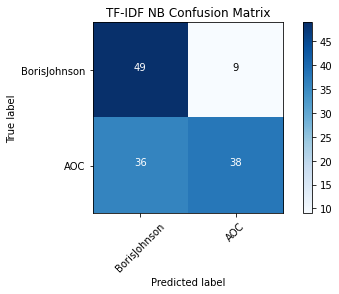

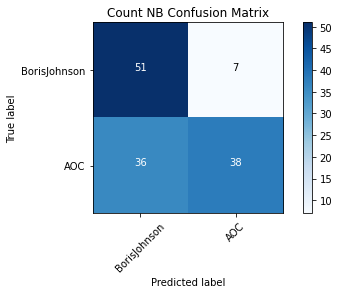

In [5]:
%matplotlib inline
from helper_functions import plot_confusion_matrix


tfidf_nb_cm = metrics.confusion_matrix(y_test, tfidf_nb_pred, labels=['BorisJohnson', 'AOC'])
count_nb_cm = metrics.confusion_matrix(y_test, count_nb_pred, labels=['BorisJohnson', 'AOC'])

plot_confusion_matrix(tfidf_nb_cm, classes=['BorisJohnson', 'AOC'], title="TF-IDF NB Confusion Matrix")

plot_confusion_matrix(count_nb_cm, classes=['BorisJohnson', 'AOC'], title="Count NB Confusion Matrix", figure=1)

LinearSVC Score:   0.720
Confusion matrix, without normalization


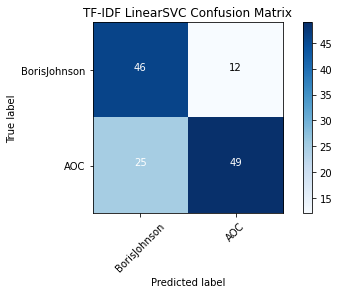

In [6]:
tfidf_svc = LinearSVC()
tfidf_svc.fit(tfidf_train, y_train)
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)
tfidf_svc_score = metrics.accuracy_score(y_test, tfidf_svc_pred)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

svc_cm = metrics.confusion_matrix(y_test, tfidf_svc_pred, labels=['BorisJohnson', 'AOC'])
plot_confusion_matrix(svc_cm, classes=['BorisJohnson', 'AOC'], title="TF-IDF LinearSVC Confusion Matrix")


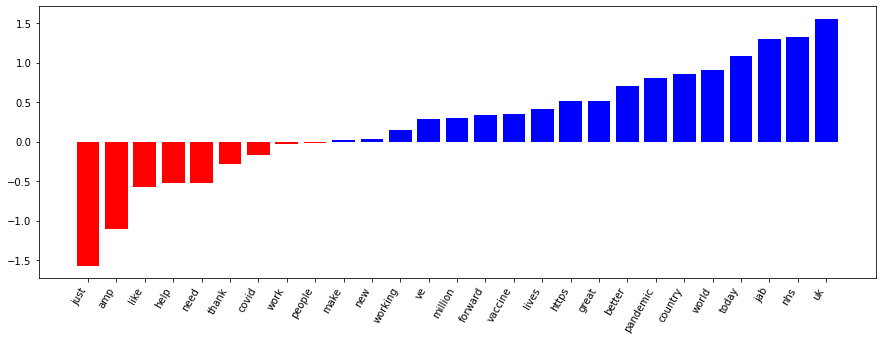

[(-1.571392067953188, 'just'),
 (-1.1081256082301203, 'amp'),
 (-0.5709361310238537, 'like'),
 (-0.5282400586634044, 'help'),
 (-0.5213708458929962, 'need'),
 (-0.2883752457487016, 'thank'),
 (-0.17555190473254842, 'covid'),
 (-0.025633038788300512, 'work'),
 (-0.019639070500012328, 'people'),
 (0.026298404989680176, 'make'),
 (0.0358824501939278, 'new'),
 (0.15135247316088693, 'working'),
 (0.2867149307391597, 've'),
 (0.30155929094176087, 'million'),
 (0.3426410233098148, 'forward'),
 (0.3445520396961667, 'vaccine'),
 (0.41377319240035, 'lives'),
 (0.5102228502056371, 'https'),
 (0.5125884767050534, 'great'),
 (0.7070527266308251, 'better'),
 (0.8057513962806446, 'pandemic'),
 (0.8574625155330323, 'country'),
 (0.901389484928821, 'world'),
 (1.0891169886420076, 'today'),
 (1.2961682523710378, 'jab'),
 (1.3219768155203768, 'nhs'),
 (1.5555764389888034, 'uk')]


In [7]:
from helper_functions import plot_and_return_top_features

from pprint import pprint
top_features = plot_and_return_top_features(tfidf_svc, tfidf_vectorizer)
pprint(top_features)

In [15]:
bj_tweet = "I would like to send my warm wishes to Her Majesty The Queen on her 95th birthday." 
aoc_tweet = "That a family had to lose a son, brother and father; that a teenage girl had to film and post a murder, that millions across the country had to organize and march just for George Floyd to be seen and valued is not justice." 

bj_tweet_vectorized = tfidf_vectorizer.transform([bj_tweet])
aoc_tweet_vectorized = tfidf_vectorizer.transform([aoc_tweet])

bj_tweet_pred = tfidf_svc.predict(bj_tweet_vectorized)
aoc_tweet_pred = tfidf_svc.predict(aoc_tweet_vectorized)

print("Predicted Boris Johnson tweet", bj_tweet_pred)
print("Predicted AOC tweet", aoc_tweet_pred)


#Tweets for Manual Test

#This is the story of the UK vaccine rollout which has already saved thousands of lives.
#Tweeted by: BJ
#Predicted: BJ

#The world’s tropical forests are the lungs of our planet and yet we’re losing these great, teeming ecosystems at an unconscionable rate. I’m pleased the UK is joining this hugely exciting coalition to protect our tropical forests and tackle climate change.
#Tweeted by: BJ
#Predicted: BJ

#We can build back better from this pandemic by building back greener.
#Tweeted by: BJ
#Predicted: BJ

#In supporting #StephenLawrenceDay we are reminded of Stephen's many talents, and our duty to stop racism and give young people the best possible future.My thoughts are with Stephen’s parents Doreen and Neville, and the many families that have lost loved ones in their prime.
#Tweeted by: BJ
#Predicted: AOC
#!! Error

#I would like to send my warm wishes to Her Majesty The Queen on her 95th birthday.
#Tweeted by: BJ
#Predicted: AOC
#!! Error

#Last January I was sworn in for my first term in Congress.
#Tweeted by: AOC
#Predicted: AOC

#Yes! And as we continue the fight for #MedicareForAll nationally, did you know that progressives established a key step for M4A here at home & across NYC?
#Tweeted by: AOC
#Predicted: AOC

#I’m glad you like it @chelliepingree! Happy Earth Day Earth globe americas 
#Tweeted by: AOC
#Predicted: AOC

#That a family had to lose a son, brother and father; that a teenage girl had to film and post a murder, that millions across the country had to organize and march just for George Floyd to be seen and valued is not justice.
#Tweeted by: AOC
#Predicted: AOC

#I welcome the Court of Appeal's decision to overturn the convictions of 39 former sub-postmasters in the Horizon dispute, an appalling injustice which has had a devastating impact on these families for years.
#Tweeted by: AOC
#Predicted: BJ
#!! Error


Predicted Boris Johnson tweet ['AOC']
Predicted AOC tweet ['AOC']


In [20]:
#Unrelated users test

test_tweet = "Buckingham Palace have released a new picture of Queen Elizabeth in celebration of her 95th birthday." 

test_tweet_vectorized = tfidf_vectorizer.transform([test_tweet])

test_tweet_pred = tfidf_svc.predict(test_tweet_vectorized)

print("Predicted test tweet", test_tweet_pred)

#Tweet for unrelated users manual test:

#Get vaccinated, folks.
#Tweeted by: President Biden
#Predicted: AOC

#Your answer to the dreaded low battery. #GalaxyS21 5G intuitively manages your usage so you never miss a moment.
#Tweeted by: Samsung Mobile US
#Predicted: AOC

#Am hosting SNL on May 8
#Tweeted by: Elon Musk
#Predicted: AOC

#It’s the Championship - all or nothing. Choose your team before the games start.
#Tweeted by: Wendy's
#Predicted: AOC

#Buckingham Palace have released a new picture of Queen Elizabeth in celebration of her 95th birthday.
#Tweeted by: The Telegraph
#Predicted: AOC


Predicted test tweet ['AOC']
